Importing required libraries:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


Reading the .csv file:

In [2]:
data = pd.read_csv('/content/heart_attack_risk_dataset.csv')

Extracting information about the dataset:

In [3]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [4]:
data.shape

(50000, 20)



*   There are 50000 rows.
*   There are 20 columns.





In [5]:
data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0




*   There are no null values in any of the columns.



Distribution of the Target Value:

In [6]:
data.Heart_Attack_Risk.value_counts()

,count
Heart_Attack_Risk,
Low,25024
Moderate,14904
High,10072


The analysis reveals a significant class imbalance in the dataset, with a higher concentration of instances labeled as Heart_Attack_Risk: Low, indicating the need for techniques like resampling or weighted metrics to address this imbalance effectively.

Numerical Feature Analysis:

In [7]:
data.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


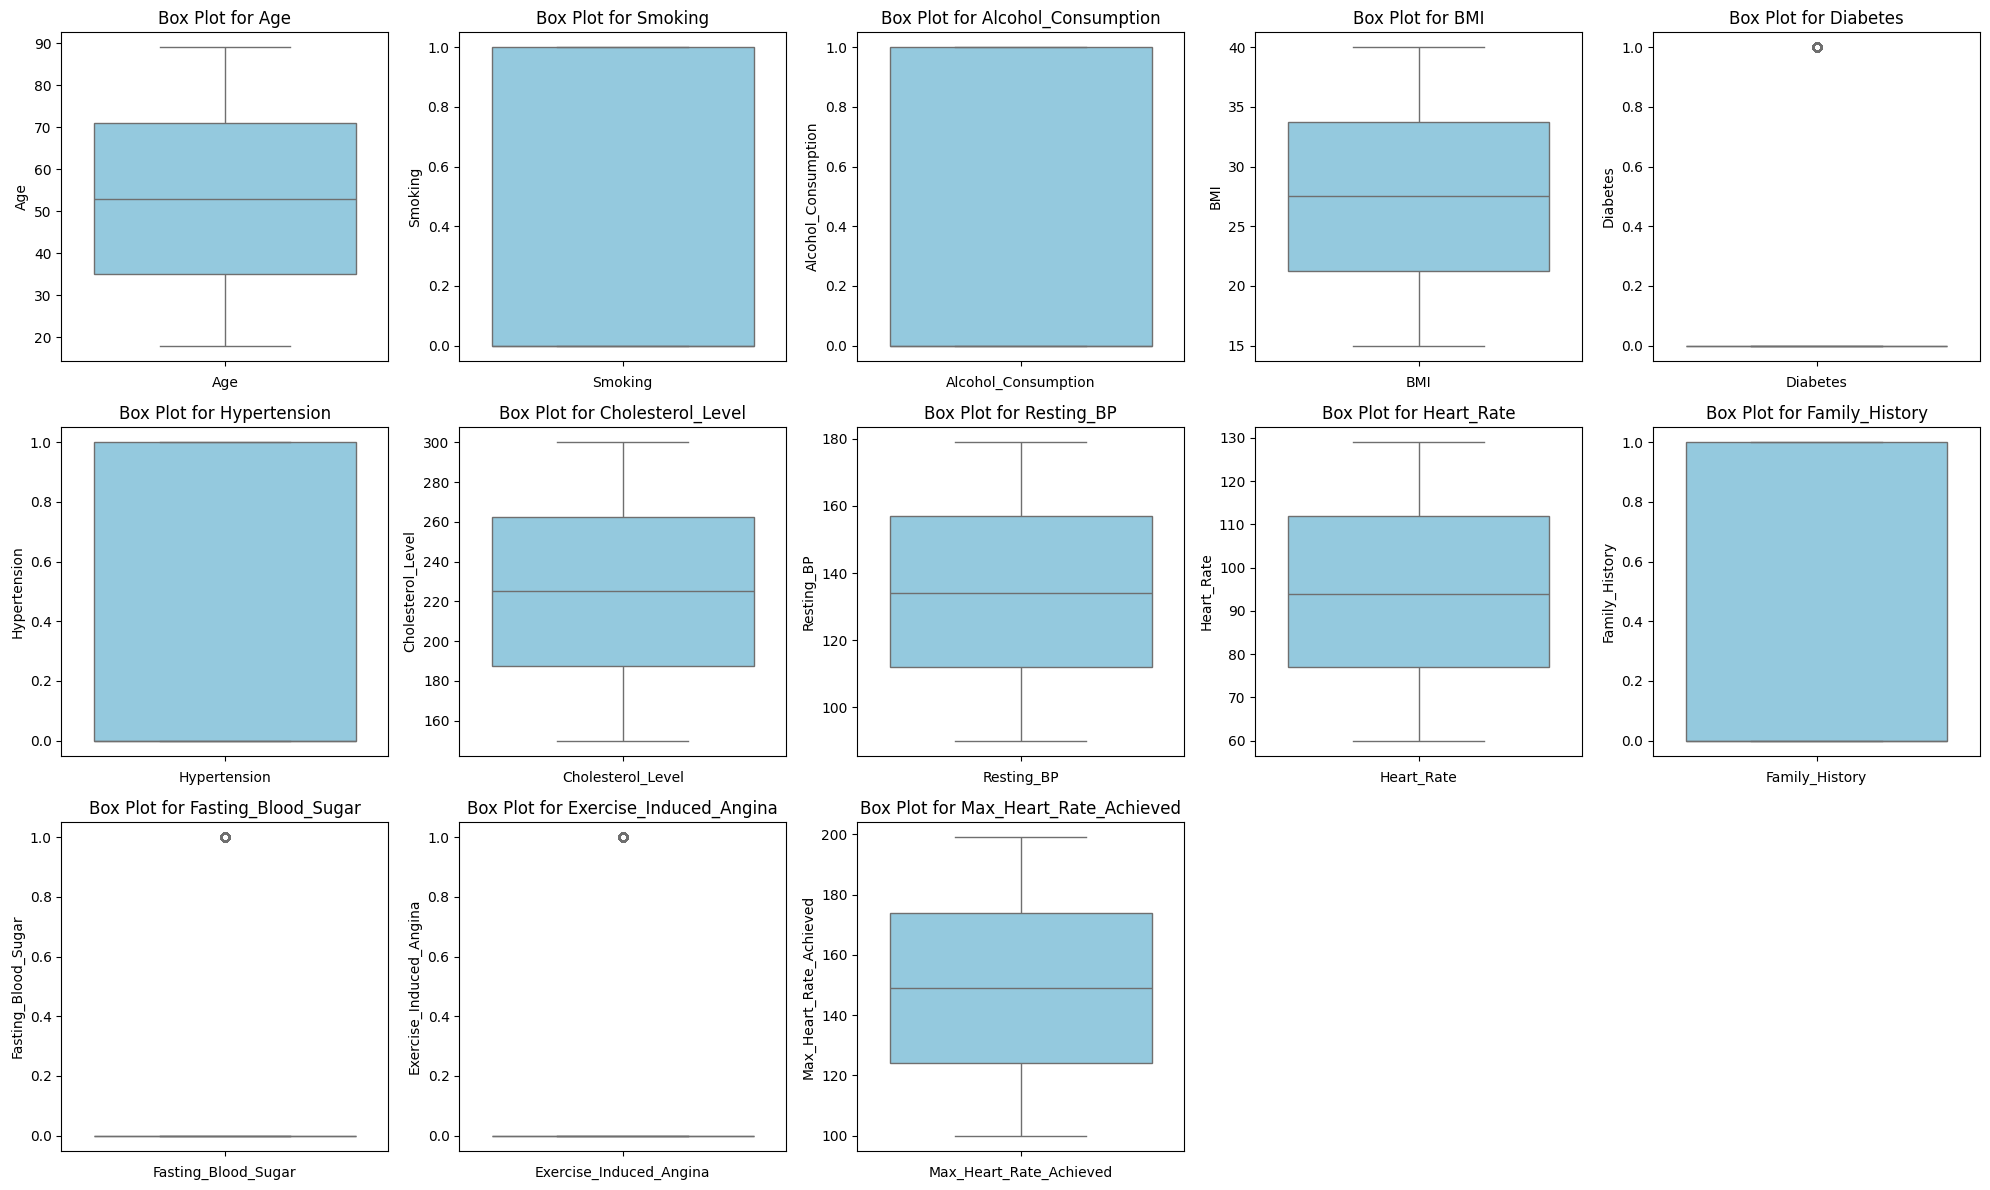

In [8]:
columns = ['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes', 'Hypertension',
           'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
           'Fasting_Blood_Sugar', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']

fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharey=False)

# Flatten axes and loop through columns
axes = axes.flatten()  # Convert 2D axes array to 1D for easy iteration
for i, col in enumerate(columns):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

# Hide remaining empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()




*   Columns such as Fasting Blood Sugar, Exercise Induced Angina, and Diabetes have outliers as a single dot- likely a rare case of 1.
*   There are no outliers for other dataset features.



Mapping Target Variable with Numerical Values:

In [9]:
data.Heart_Attack_Risk= data.Heart_Attack_Risk.map({'Low':1, 'Moderate':2, 'High':3})

In [10]:
data.head(2)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,1
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,2


Correlation between the features and the target variable:

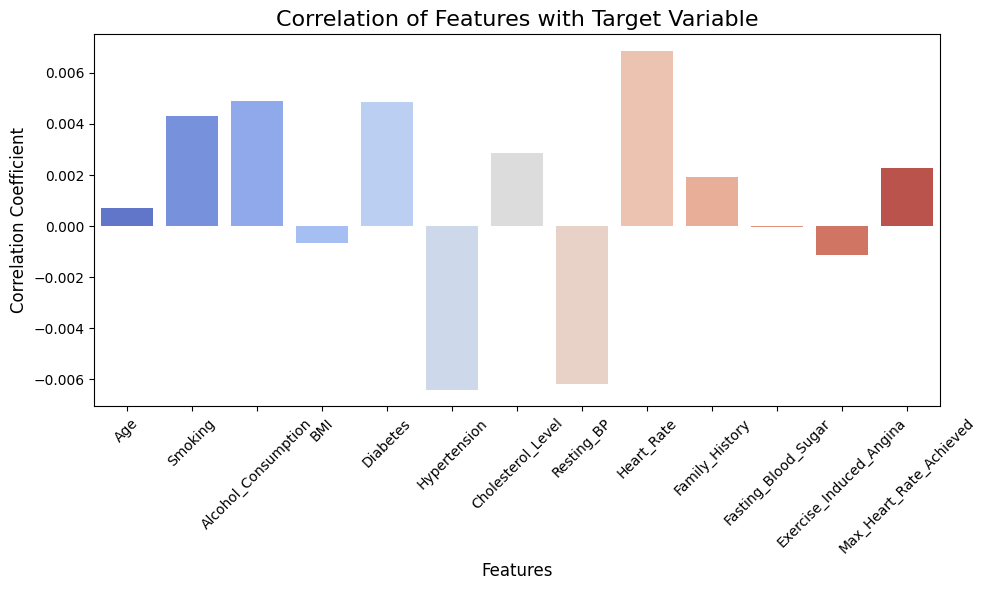

In [11]:
# Compute correlation with the target variable
correlation = data[columns + ['Heart_Attack_Risk']].corr()['Heart_Attack_Risk'].drop('Heart_Attack_Risk')

# Plot correlation using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation of Features with Target Variable', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

Key Findings:

1. Features with Positive Correlation:

Age: A weak positive correlation
suggests that age slightly increases the likelihood of the target outcome. Age can serve as a background variable in risk stratification.

Smoking & Alcohol Consumption: These lifestyle factors are positively correlated with the target, highlighting their potential cumulative impact on health risks.

Diabetes: Its positive association reinforces the role of diabetes in influencing the target variable, potentially as a critical predictor.

Cholesterol Level: Higher cholesterol levels show a notable positive correlation, aligning with existing clinical studies linking cholesterol to adverse health outcomes.

Heart Rate & Max Heart Rate Achieved: These two features demonstrate positive correlation, indicating their importance in predictive modeling. They could signify physical fitness or cardiovascular stress.

Family History: A hereditary factor, positively correlated with the target, emphasizes the need for genetic predisposition analysis.

Fasting Blood Sugar: A minor but relevant positive correlation highlights its utility in conjunction with other features for risk prediction.


2. Features with Negative Correlation:

Hypertension: The negative correlation suggests individuals with hypertension might exhibit reduced target outcomes, potentially due to treatment or compensatory mechanisms.

Resting BP: Lower resting blood pressure is inversely correlated with the target, implying its protective role.

Exercise-Induced Angina: This feature shows an inverse relationship, likely reflecting an individual's exercise tolerance and cardiovascular health.



Encoding the Categorical Features:

In [12]:
data.Gender =data.Gender.map({'Male':1,'Female':2})
data.Physical_Activity_Level =data.Physical_Activity_Level.map({'Low':1,'Moderate':2,'High':3})
data.Stress_Level =data.Stress_Level.map({'Low':1,'Moderate':2,'High':3})
data.Chest_Pain_Type =data.Chest_Pain_Type.map({'Typical':1,'Atypical':2,'Non-anginal':3,'Asymptomatic':4})
data.Thalassemia =data.Thalassemia.map({'Normal':1,'Fixed defect':2,'Reversible defect':3})
data.ECG_Results =data.ECG_Results.map({'Normal':1,'ST-T abnormality':2,'Left Ventricular Hypertrophy':3})

In [13]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,2,1,0,2,34.61,1,0,152.1,171,85,0,2,3,3,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,4,1,0,2,0,173,2
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,1,3,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,1,2,1,3,0,129,1
4,38,2,1,0,2,19.82,0,0,207.7,123,107,0,3,4,3,0,2,0,124,2


Feature Scaling using Min-Max Scaler:

In [14]:
#Dropping the target Variable for feature dataset
X= data.drop("Heart_Attack_Risk",axis=1)

#Extracting the target variable
y=data['Heart_Attack_Risk']

In [15]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [16]:
#Splitting the data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Logistic Regression:

In [17]:
model= LogisticRegression()
#Training the model
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
#Predicting using trained model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930
           3       0.00      0.00      0.00      1987

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



Model Bias:
The logistic regression model demonstrates a significant bias towards predicting the majority class (1), achieving perfect recall for this class.
However, it completely fails to predict the minority classes (2 and 3), as evidenced by a precision, recall, and F1-score of 0.00 for these classes.

Poor Generalization:
The model struggles to generalize across all classes, as it cannot distinguish between minority classes (2 and 3) in the feature space.
This indicates a lack of representation and learning for the minority class data.

Impact of Class Imbalance:
The substantial class imbalance skews the model's predictions towards the dominant class, leading to an overall weighted F1-score of 0.34 and a macro-average F1-score of 0.22.
The minority classes suffer from poor recall, which highlights the need for strategies to mitigate the imbalance.

Accuracy Misleading:
While the model achieves an overall accuracy of 51%, this metric is misleading due to the heavy reliance on the majority class.
Metrics like F1-score and recall for individual classes reveal the true inefficiencies in the model's performance.

Decision Tree Classifier:

In [19]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model1.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.49      0.50      5083
           2       0.29      0.30      0.29      2930
           3       0.19      0.21      0.20      1987

    accuracy                           0.38     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.38      0.38      0.38     10000



Improved Performance for Minority Classes:
The decision tree outperforms logistic regression for minority classes (2 and 3), with higher precision, recall, and F1-scores for these classes.
This improvement suggests that the decision tree is better equipped to capture non-linear relationships in the data, which logistic regression cannot.

Balanced Predictions Across Classes:
The decision tree provides a more balanced prediction across all classes, with macro-average and weighted-average F1-scores of 0.33 and 0.38, respectively.
However, this balance comes at the cost of lower overall accuracy (38%), highlighting a trade-off between accuracy and fairness across classes.

Persistent Weakness in Minority Class Predictions:
Despite the improvement, the performance for minority classes (2 and 3) remains weak, with F1-scores of 0.29 and 0.20, respectively.
This indicates that the model still struggles to effectively separate minority classes in the feature space, likely due to the class imbalance and potentially insufficient tree depth or splits.

Impact of Class Imbalance:
The class imbalance significantly affects the model's performance, as seen in the disparity between the majority class (1) and the minority classes (2 and 3).
The majority class achieves the highest F1-score (0.50), while minority classes perform noticeably worse.

Random Forest Classifier:

In [24]:
model2 = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree (default None for no limit)
    random_state=42,   # Ensures reproducibility
    class_weight='balanced'  # Handles class imbalance
)
model2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = model2.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.97      0.67      5083
           2       0.33      0.04      0.06      2930
           3       0.27      0.00      0.00      1987

    accuracy                           0.50     10000
   macro avg       0.37      0.34      0.25     10000
weighted avg       0.41      0.50      0.36     10000



Strong Performance for the Majority Class:
The random forest classifier performs exceptionally well for the majority class (1), achieving a high recall of 0.97 and an F1-score of 0.67.
This indicates that the model effectively predicts most instances of the majority class but does so at the expense of minority classes.

Weak Predictions for Minority Classes:
The minority classes (2 and 3) show poor performance, with very low F1-scores of 0.06 and 0.00, respectively.
The model struggles to correctly identify these classes, as reflected in the low recall (0.04 for class 2 and 0.00 for class 3).

Accuracy and Weighted Metrics:
The overall accuracy of the model is 50%, which is largely driven by the correct predictions for the majority class.
Weighted average precision, recall, and F1-scores are 0.41, 0.50, and 0.36, respectively, further emphasizing the imbalance in the model's performance.

Impact of Class Imbalance:
Similar to the decision tree and logistic regression, the class imbalance significantly affects the random forest's ability to generalize to minority classes.
The random forest model prioritizes the majority class due to the imbalance in the dataset, resulting in poor recall and F1-scores for minority classes.

Insights on Random Forest Behavior:
Although random forests are typically robust against overfitting and can handle complex relationships, the model is unable to balance predictions across classes in this case.
The extremely low recall for classes 2 and 3 suggests that the model may not have enough data points or diversity in these classes to effectively learn their patterns.

Comparison with Other Models:
Compared to the decision tree classifier, the random forest achieves higher accuracy and performs slightly better for the majority class. However, the performance for minority classes is worse than that of the decision tree, which at least achieved marginally better recall and F1-scores for these classes.


Conclusions:



*   All three models exhibit notable challenges in predicting minority classes, primarily due to the significant class imbalance and potentially overlapping feature distributions, which hinder the model's ability to effectively distinguish between classes.

*   Logistic Regression demonstrated a complete failure in identifying minority classes, likely due to its sensitivity to class imbalance and linear decision boundaries. Although Decision Tree and Random Forest showed some improvement, their performance on minority classes remains suboptimal, with Random Forest slightly outperforming the other two.

*   Given these findings, Random Forest emerges as the most promising model, showing the best results in handling class imbalance, though further refinement is necessary. Specifically, addressing the imbalance through techniques such as oversampling, undersampling, or advanced cost-sensitive methods, along with additional hyperparameter tuning, is crucial for improving the predictive accuracy of the minority class. These steps are essential to ensure more robust and fair performance across all classes.




